In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_excel("/content/yahoo_data.xlsx")

In [5]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [6]:
df.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
1253,"May 07, 2018",24317.66,24479.45,24263.42,24357.32,24357.32,307670000
1254,"May 04, 2018",23865.22,24333.35,23778.87,24262.51,24262.51,329480000
1255,"May 03, 2018",23836.23,23996.15,23531.31,23930.15,23930.15,389240000
1256,"May 02, 2018",24097.63,24185.52,23886.30,23924.98,23924.98,385350000
1257,"May 01, 2018",24117.29,24117.29,23808.19,24099.05,24099.05,380070000


In [7]:
# Convert financial data into time-series format to optimize the data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [8]:
#Compute Relative Strength Index (RSI)
def compute_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = compute_rsi(df['Close*'])

In [9]:
#Compute Rolling Statistics (Market Stability)
df['Mean_Close'] = df['Close*'].rolling(window=20).mean()
df['SD_Close'] = df['Close*'].rolling(window=20).std()

In [10]:
#Compute Simple Moving Averages (SMA)
df['SMA_50'] = df['Close*'].rolling(window=50).mean()  # 50-day SMA
df['SMA_200'] = df['Close*'].rolling(window=200).mean()  # 200-day SMA

In [11]:
#Compute Momentum Indicator
df['Momentum'] = df['Close*'].diff(10)  # Difference between current price & 10 periods ago

In [12]:
mean_value = df['Close*'].mean()
std_value = df['Close*'].std()
print(f"Overall Mean Closing Price: {mean_value:.2f}")
print(f"Overall Standard Deviation of Closing Price: {std_value:.2f}")

Overall Mean Closing Price: 29599.36
Overall Standard Deviation of Closing Price: 4007.47


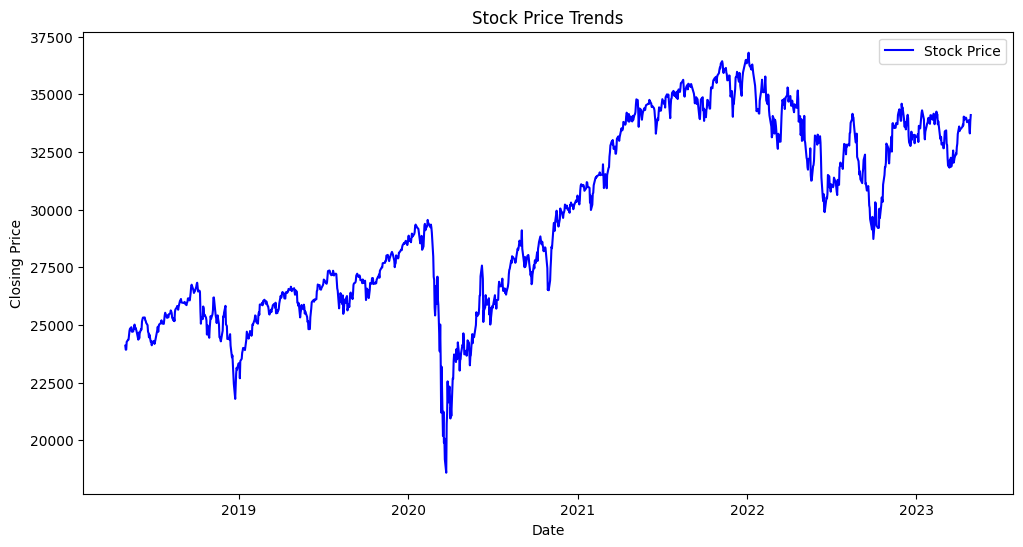

In [13]:
# Visualize stock price trends with Mean
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close*'], label='Stock Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Trends')
plt.legend()
plt.show()

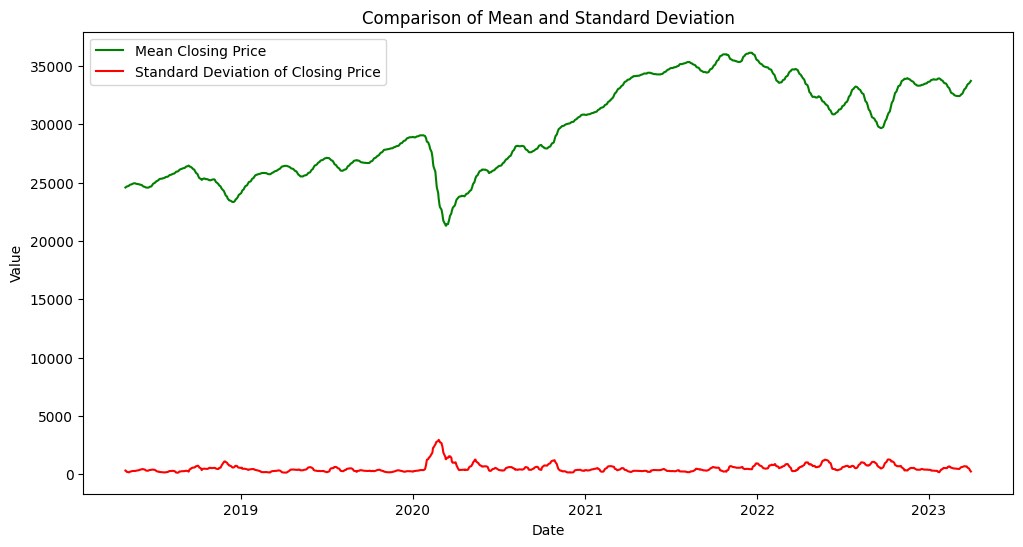

In [14]:
# Compare Mean & Standard Deviation over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Mean_Close'], label='Mean Closing Price', color='green')
plt.plot(df.index, df['SD_Close'], label='Standard Deviation of Closing Price', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Mean and Standard Deviation')
plt.legend()
plt.show()



In [15]:
# Creating a target variable (1 if next day's price is higher, else 0)
df['Target'] = (df['Close*'].shift(-1) > df['Close*']).astype(int)
df.dropna(inplace=True)


In [16]:
#Select features for training
features = ['Open', 'High', 'Low', 'Volume', 'Mean_Close', 'SD_Close', 'SMA_50', 'SMA_200', 'RSI', 'Momentum']
X = df[features]
y = df['Target']

In [17]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
#Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#Train & Evaluate Individual Models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "SVM": SVC(kernel='linear', C=1.0),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=10)
}

In [20]:
accuracies = {}

# Logistic Regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracies["Logistic Regression"] = accuracy_score(y_test, y_pred_lr)

In [21]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracies["SVM"] = accuracy_score(y_test, y_pred_svm)

In [22]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracies["Random Forest"] = accuracy_score(y_test, y_pred_rf)

In [23]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracies["Decision Tree"] = accuracy_score(y_test, y_pred_dt)

In [24]:
#showing the Model Accuracies
for model, acc in accuracies.items():
    print(f"{model} Accuracy: {acc:.2f}")

Logistic Regression Accuracy: 0.71
SVM Accuracy: 0.72
Random Forest Accuracy: 0.52
Decision Tree Accuracy: 0.55


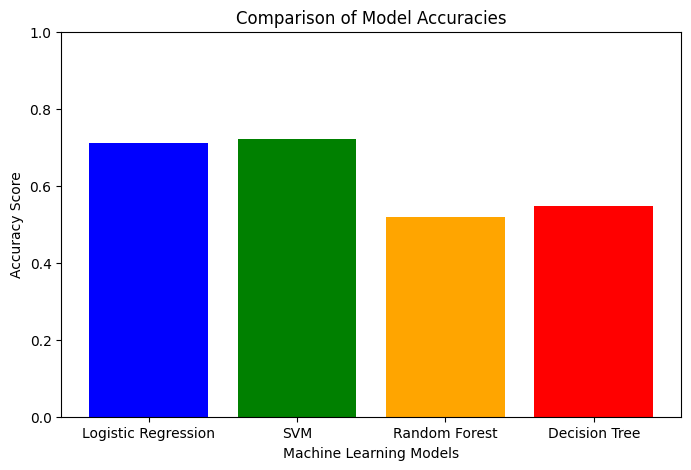

In [25]:
#Creating a Bar Chart for Model Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.show()

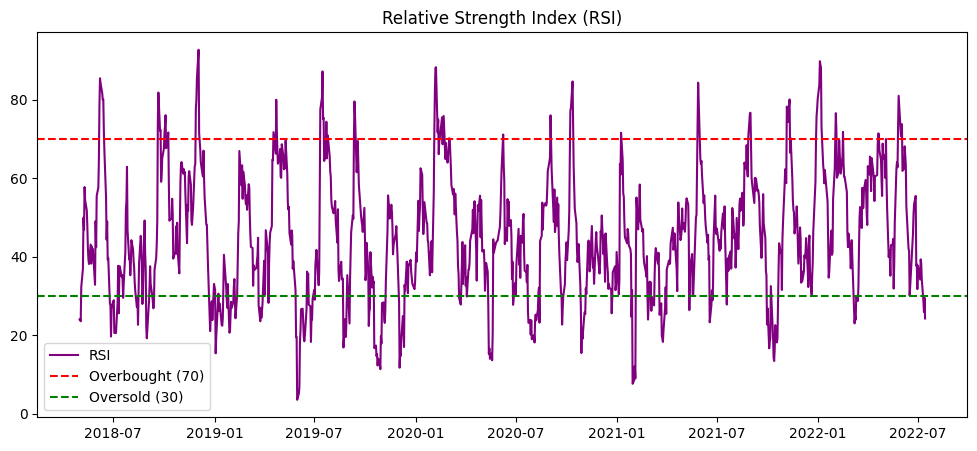

In [26]:
#Plot RSI(Relative Strength Index)
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='dashed', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='dashed', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()


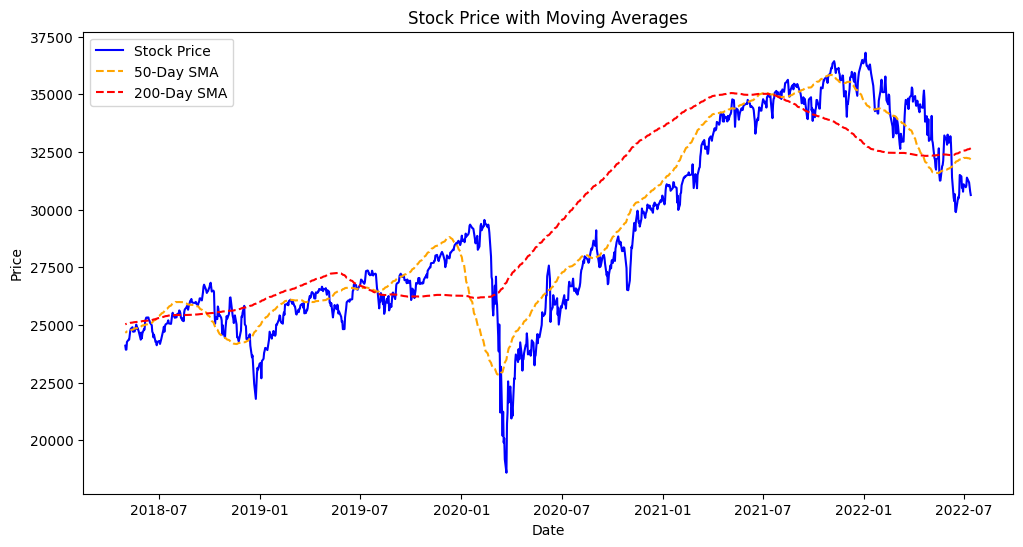

In [27]:
#Plot Moving Averages & Stock Price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close*'], label='Stock Price', color='blue')
plt.plot(df.index, df['SMA_50'], label='50-Day SMA', linestyle='dashed', color='orange')
plt.plot(df.index, df['SMA_200'], label='200-Day SMA', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

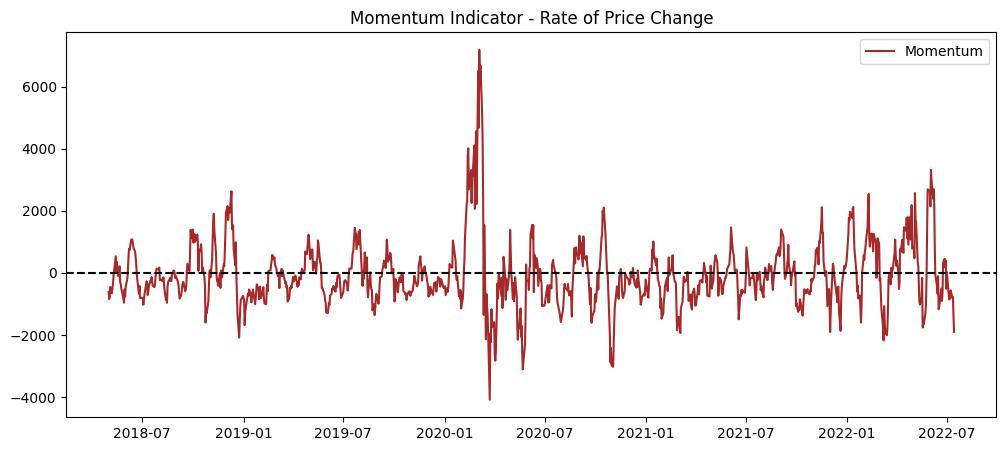

In [28]:
#Plot Momentum Indicator
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Momentum'], label='Momentum', color='brown')
plt.axhline(0, linestyle='dashed', color='black')
plt.title('Momentum Indicator - Rate of Price Change')
plt.legend()
plt.show()